<a href="https://colab.research.google.com/github/raianegoncalves/raianecgoncalves/blob/main/Aula_Revis%C3%A3o_Py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Importando dados do Quadro de Medalhas 1896 a 2022**

In [ ]:
# Importando os dados para um DataFrame
df = pd.read_csv('game_medal_tally.csv')

# Exibindo as primeiras linhas do DataFrame
print(df.head())


   year               edition  edition_id        country country_noc  gold  \
0  1896  1896 Summer Olympics           1         Greece         GRE    10   
1  1900  1900 Summer Olympics           2         France         FRA    31   
2  1900  1900 Summer Olympics           2  United States         USA    20   
3  1904  1904 Summer Olympics           3  United States         USA    80   
4  1908  1908 Summer Olympics           5  Great Britain         GBR    56   

   silver  bronze  total  
0      18      19     47  
1      41      40    112  
2      13      15     48  
3      85      83    248  
4      51      39    146  


**Data prep**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1807 entries, 0 to 1806
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         1807 non-null   int64 
 1   edition      1807 non-null   object
 2   edition_id   1807 non-null   int64 
 3   country      1807 non-null   object
 4   country_noc  1807 non-null   object
 5   gold         1807 non-null   int64 
 6   silver       1807 non-null   int64 
 7   bronze       1807 non-null   int64 
 8   total        1807 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 127.2+ KB


In [ ]:
df.describe()

,year,edition_id,gold,silver,bronze,total
count,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000,1807.000000
mean,1979.744328,31.635307,3.737133,3.721638,3.971223,11.429994
std,32.726372,18.472012,7.554092,6.411636,6.169554,19.423201
min,1896.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1960.000000,17.000000,0.000000,1.000000,1.000000,2.000000
50%,1988.000000,25.000000,1.000000,2.000000,2.000000,5.000000
75%,2008.000000,53.000000,4.000000,4.000000,5.000000,13.000000
max,2022.000000,62.000000,83.000000,85.000000,83.000000,248.000000


In [ ]:
#Verificando se tem nulos
df.isnull().sum()

,0
year,0
edition,0
edition_id,0
country,0
country_noc,0
gold,0
silver,0
bronze,0
total,0


In [ ]:
#Preenche valores ausentes
df.fillna(0, inplace=True)

In [ ]:
#Remoção de duplicados
df.drop_duplicates(inplace=True)

**Análise Exploratória de Dados (EDA)**

In [ ]:
#Distribuição de Medalhas por País

medalhas_por_pais = df.groupby('country')[['gold', 'silver', 'bronze']].sum()
print(medalhas_por_pais)

                        gold  silver  bronze
country                                     
Afghanistan                0       0       2
Algeria                    5       4       8
Argentina                 21      26      30
Armenia                    2       8       8
Australasia                3       4       5
...                      ...     ...     ...
West Germany              67      82      94
West Indies Federation     0       0       2
Yugoslavia                26      32      29
Zambia                     0       1       1
Zimbabwe                   3       4       1

[154 rows x 3 columns]


In [ ]:
#Ordenando por quantidade de ouros

medalhas_por_pais.sort_values(by='gold', ascending=False)

,gold,silver,bronze
country,,,
United States,1195,969,845
Soviet Union,473,376,355
Germany,355,377,366
Great Britain,312,339,337
France,287,308,356
...,...,...,...
Iraq,0,0,1
North Macedonia,0,1,1
Cyprus,0,1,0


In [ ]:
#Top 10 países com mais medalhas

top_10_paises = medalhas_por_pais.sort_values(by='gold', ascending=False).head(10)
print(top_10_paises)

                            gold  silver  bronze
country                                         
United States               1195     969     845
Soviet Union                 473     376     355
Germany                      355     377     366
Great Britain                312     339     337
France                       287     308     356
People's Republic of China   285     231     197
Italy                        271     244     274
Sweden                       216     233     248
Norway                       208     188     173
Russian Federation           194     169     188


In [ ]:
#Selecionando um range de datas, trazer dados após 1989.
df_novo = df[df['year'] >= 1989]
print(df_novo.head())

    year               edition  edition_id        country country_noc  gold  \
40  1992  1992 Summer Olympics          23   Unified Team         EUN    45   
41  1992  1992 Summer Olympics          23        Germany         GER    33   
42  1992  1992 Summer Olympics          23  United States         USA    37   
43  1996  1996 Summer Olympics          24        Germany         GER    20   
44  1996  1996 Summer Olympics          24      Australia         AUS     9   

    silver  bronze  total  
40      38      29    112  
41      21      28     82  
42      34      37    108  
43      18      27     65  
44       9      23     41  


In [ ]:
#Distribuição de Medalhas por País

medalhas_por_pais = df_novo.groupby('country')[['gold', 'silver', 'bronze', 'total']].sum()
print(medalhas_por_pais)

             gold  silver  bronze  total
country                                 
Afghanistan     0       0       2      2
Algeria         5       4       6     15
Argentina       8       7      16     31
Armenia         2       8       8     18
Australia     102     114     135    351
...           ...     ...     ...    ...
Uzbekistan     11       6      20     37
Venezuela       2       5       4     11
Vietnam         1       3       1      5
Zambia          0       1       0      1
Zimbabwe        2       4       1      7

[135 rows x 4 columns]


In [ ]:
#Ordenando por quantidade de ouros

medalhas_por_pais.sort_values(by='gold', ascending=False)

,gold,silver,bronze,total
country,,,,
United States,394,348,320,1062
People's Republic of China,265,212,176,653
Germany,231,217,219,667
Russian Federation,193,165,185,543
Great Britain,128,107,124,359
...,...,...,...,...
San Marino,0,1,2,3
Guatemala,0,1,0,1
Namibia,0,5,0,5


In [ ]:
#Top 10 países com mais medalhas de ouro

top_10_paises = medalhas_por_pais.sort_values(by='gold', ascending=False).head(10)
print(top_10_paises)

                            gold  silver  bronze  total
country                                                
United States                394     348     320   1062
People's Republic of China   265     212     176    653
Germany                      231     217     219    667
Russian Federation           193     165     185    543
Great Britain                128     107     124    359
Norway                       116      93      86    295
France                       113     124     150    387
Republic of Korea            110      99      87    296
Italy                        104     107     140    351
Australia                    102     114     135    351


In [ ]:
#Top 10 países com mais medalhas

top_10_paises_tt = medalhas_por_pais.sort_values(by='total', ascending=False).head(10) #o by vai ordenar por total
print(top_10_paises_tt)

                            gold  silver  bronze  total
country                                                
United States                394     348     320   1062
Germany                      231     217     219    667
People's Republic of China   265     212     176    653
Russian Federation           193     165     185    543
France                       113     124     150    387
Great Britain                128     107     124    359
Italy                        104     107     140    351
Australia                    102     114     135    351
Canada                        96     109     127    332
Japan                         98      99     125    322


In [ ]:
#Criando um ranking de medalhas por país

# Ordenar o DataFrame
df_ordena = df_novo.sort_values(by=['gold', 'silver', 'bronze'], ascending=[False, False, False])

# Criar a coluna de ranking
df_ordena['rank'] = df_ordena.reset_index(drop=True).index + 1

# Encontrar a posição do Brasil
brazil_rank = df_ordena[df_ordena['country'] == 'Brazil']['rank'].values[0]
print(f'O Brasil está na posição {brazil_rank}')

# Exibir o DataFrame com a coluna de Ranking
print(df)

O Brasil está na posição 131
      year               edition  edition_id        country country_noc  gold  \
0     1896  1896 Summer Olympics           1         Greece         GRE    10   
1     1900  1900 Summer Olympics           2         France         FRA    31   
2     1900  1900 Summer Olympics           2  United States         USA    20   
3     1904  1904 Summer Olympics           3  United States         USA    80   
4     1908  1908 Summer Olympics           5  Great Britain         GBR    56   
...    ...                   ...         ...            ...         ...   ...   
1802  2008  2008 Summer Olympics          53      Australia         AUS    14   
1803  2008  2008 Summer Olympics          53           Cuba         CUB     3   
1804  2012  2012 Summer Olympics          54          Japan         JPN     7   
1805  2016  2016 Summer Olympics          59  Great Britain         GBR    27   
1806  2020  2020 Summer Olympics          61          Japan         JPN    27   

**Manipulação de Dados com Numpy**

In [ ]:
# Média de medalhas por país

avg_medals= np.mean(medalhas_por_pais, axis=1)
avg_medals = avg_medals.sort_values(ascending=False)
print(avg_medals)

country
United States                 531.0
Germany                       333.5
People's Republic of China    326.5
Russian Federation            271.5
France                        193.5
                              ...  
Eritrea                         0.5
Peru                            0.5
Liechtenstein                   0.5
Suriname                        0.5
Panama                          0.5
Length: 135, dtype: float64


In [ ]:
#País com mais medalhas em 2022

ano_filtro = df[df['year'] == 2022]
pais_top_2008 = ano_filtro[ano_filtro['total'] == np.max(ano_filtro['total'])]

print(pais_top_2008[['country', 'total']])


     country  total
1768  Norway     37


**Plotando de Dados com MatplotLib Pyplot**

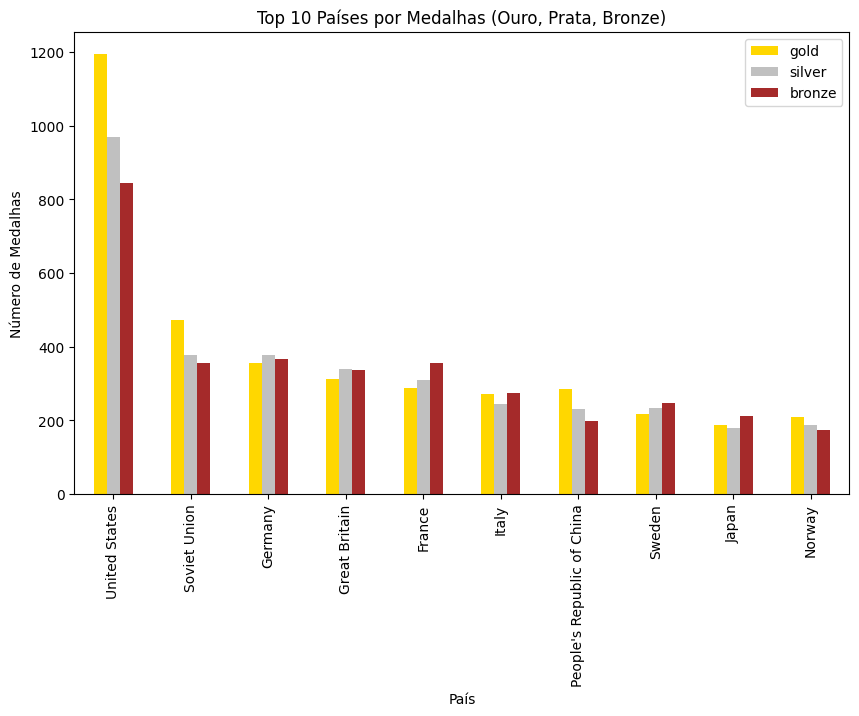

In [ ]:
#Gráfico de Barras para Medalhas de Ouro, Prata e Bronze


top_countries = df.groupby('country').sum().sort_values('total', ascending=False).head(10)
top_countries[['gold', 'silver', 'bronze']].plot(kind='bar', figsize=(10, 6), color=['gold', 'silver', 'brown'])
plt.title('Top 10 Países por Medalhas (Ouro, Prata, Bronze)')
plt.xlabel('País')
plt.ylabel('Número de Medalhas')
plt.show()


In [ ]:
#Quadro de medalhas do Brazil
df_brazil = df[(df['country'] == 'Brazil') & (df['year'] >= 2000)]

df_brazil.head()


,year,edition,edition_id,country,country_noc,gold,silver,bronze,total
1274,2004,2004 Summer Olympics,26,Brazil,BRA,5,2,3,10
1540,2000,2000 Summer Olympics,25,Brazil,BRA,0,6,6,12
1559,2016,2016 Summer Olympics,59,Brazil,BRA,7,6,6,19
1643,2020,2020 Summer Olympics,61,Brazil,BRA,7,6,8,21
1676,2012,2012 Summer Olympics,54,Brazil,BRA,3,5,9,17


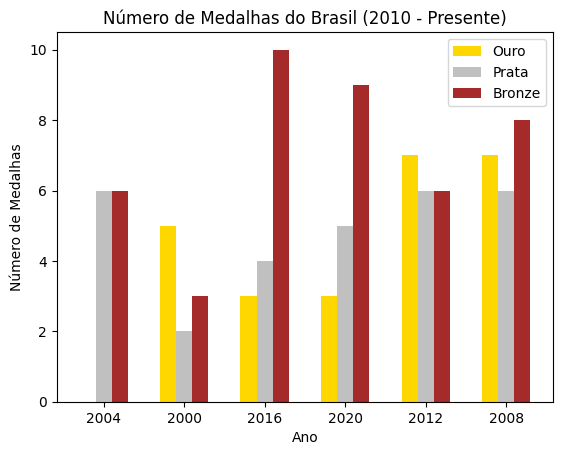

In [ ]:
# Configurar o gráfico
years = df_brazil['year'].unique()
gold_medals = df_brazil.groupby('year')['gold'].sum()
silver_medals = df_brazil.groupby('year')['silver'].sum()
bronze_medals = df_brazil.groupby('year')['bronze'].sum()

bar_width = 0.2  # Largura das barras
index = np.arange(len(years))

# Criar as barras
plt.bar(index, gold_medals, bar_width, label='Ouro', color='gold')
plt.bar(index + bar_width, silver_medals, bar_width, label='Prata', color='silver')
plt.bar(index + 2 * bar_width, bronze_medals, bar_width, label='Bronze', color='brown')

# Configurar os rótulos e título
plt.xlabel('Ano')
plt.ylabel('Número de Medalhas')
plt.title('Número de Medalhas do Brasil (2010 - Presente)')
plt.xticks(index + bar_width, years)
plt.legend()

# Mostrar o gráfico
plt.show()
